# **Proyecto 6** 

Proyecto final realizado por Sebastián Mena y Nicole Caicedo 

# Introduccion
Una base de datos es una recopilacion de informacion o datos de una maneraorgnizada y estructurada. Se almacenan en sistemas de gestion de base de datos de forma electrónica. Los datos suelenutilizar estructuras de filas y columnas en varias tablas donde aumentaremos la eficacia en procesamiento u consulta de datos, de manera que podamos gestionar, editar , guardar , eliminar y mostar los datos que tengamos en estasbases de datos. 
### Mnist
MINST se refire a la base de datos de la Organizacion Nacional de Puntos de Referencia e Innovación Modificada. esta es una base de datos enorme en la cual hay digitos escritos de manra manual para preparar sistemas diferentes en los cuales se manejan imágenes. Esta base de datos también se utiliza usualmente para el ensayo de machine learning. Este se creó  "remezclando" los ejemplos de datos tomados por el NIST.  
 Además, la base de datos se utiliza generalmente para la preparación y el ensayo en el campo del aprendizaje por máquina. Se creó “remezclando” los ejemplos de los conjuntos de datos únicos del NIST. Las imágenes que eran altamente contrastantes del NIST fueron estandarizadas para que estas encajaran en una caja que las delimitaba a 28×28 píxeles, que presentaban niveles de escala de grises. La base de datos del MNIST contiene 10 000 imágenes de prueba 60 000 de preparacion. 

### Tensorflow
Tensorflow es una herramienta para el desarrollo de la inteligencia artificial y aprendizaje automático. Es una librería de código libre para Machine Learning. Este fue desarrollado por Google a partir de redes neuronales que eran artificiales. Esta herramienta permite construir y entrenar redes neuronales para que estas detecten patrones y razonamientos tal como lo usarían los humanos.

### Keras 
Keras es una librería que nos proporciona acceso de alto nivel usando una API a las funciones d Tensorflow. Esto nos permite crear redes neuronales complejas de una manera sencilla. Keras usa un API que nos ayuda a minimizar el número de interacciones con el usuario para casos de uso comunes.


### Redes Neuronales

Las redes neuronales son modelos del funcionamiento nervioso del cuerpo. La base son las neuronas y estas se organizan en capas. Esta emula el modo en el que el cerebro humano está procesando la información. En una red neuronal hay tres capas usualmente. La capa de entrda con los unidades que son como los campos de entrada, una o mas capas ocultas y la capa de salida con una o mas unidades que serían el campo o los campos de salida. Las unidades se conectan con fuerzasde conexion y los datos se esparcen desde cada neurona hasta cada neurona que este en las siguientes capas. La red aprendcuando está examinando los registros individuales, así crea predicciones paa cada registro y realiza ajustescuando se predice de manera incorrecta.

En un inicio todas las ponderaciones son aleatorias y ls respuestasmuy posiblemente poco coherentes. La red solo puede aprender en base al entrenamiento. Se le presentan ejemplos continuamente y las respuestas se comparan con resultados que ya seanconocidos. Mientras más se entrena, más precisa se hace la red.





## Preparación

### Se cargan los weights de la Red Neuronal de Drive

Se van a cargar los pesos de los dos modelos que ya fueron entrenados previamente. Se hace esto para evitar el entrenamiento en tiempo real, el cual puede tarde mucho tiempo en ejecutarse por la gran cantidad de datos del dataset (60 000) y aparte la validación cruzada del KFold.

In [ ]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id_train = '1iLuJJvGjTC-ZP7FUh9uF3a14DlgIP47d' # URL id. 
downloaded_train = drive.CreateFile({'id': file_id_train})
downloaded_train.GetContentFile('check.zip')
!ls 

check.zip  model_plot.png  model.png  sample_data  tmp


In [ ]:
file_id_train = '1c-qUnC1XFzn8-n1XlqO6G0eTbvFKoOVP' # URL id. 
downloaded_train = drive.CreateFile({'id': file_id_train})
downloaded_train.GetContentFile('check2.zip')
!ls 

check2.zip  check.zip  model_plot.png  model.png  sample_data  tmp


In [ ]:
file_id_train = '1EAbmr4_YSDS9yd4xqVTHAnbc-cRsphxG' # URL id. 
downloaded_train = drive.CreateFile({'id': file_id_train})
downloaded_train.GetContentFile('seis_prueba.png')
!ls 

check2.zip  checkpoint2  model_plot.png  sample_data	  tmp
checkpoint  check.zip	 model.png	 seis_prueba.png


In [ ]:
file_id_train = '14X4_uygm-2uXp3F28spxOWNytYfOd20i' # URL id. 
downloaded_train = drive.CreateFile({'id': file_id_train})
downloaded_train.GetContentFile('uno_prueba.png')
!ls 

check2.zip  checkpoint2  model_plot.png  sample_data	  tmp
checkpoint  check.zip	 model.png	 seis_prueba.png  uno_prueba.png


In [ ]:
file_id_train = '1Oy7wyE-QqQRv3u1L6ZY3wD5EsULJZqT3' # URL id. 
downloaded_train = drive.CreateFile({'id': file_id_train})
downloaded_train.GetContentFile('ocho_prueba.png')
!ls 

check2.zip   check.zip	     ocho_prueba.png  tmp
checkpoint   model_plot.png  sample_data      uno_prueba.png
checkpoint2  model.png	     seis_prueba.png


### Importar librerías

In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils.vis_utils import plot_model
from keras.layers import Dense 
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from random import randint
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from PIL import Image
from numpy import asarray

In [ ]:
print(tf. __version__)

2.9.2


### Se descarga el dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000, 10)

In [5]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
y_test[0]

7

### Graficar el dataset

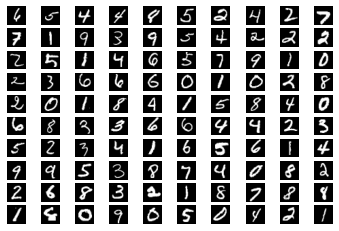

In [ ]:
x_train_copy = x_train

for i in range(100):
  ejes = plt.subplot(10,10,i+1)
  ejes.axis("off")
  plt.imshow(x_train_copy[randint(0, x_train.shape[0])], cmap = "gray")

### Procesar los datos para poder usarlos

In [ ]:
image_size = 784

In [ ]:
x_train = x_train.reshape(x_train.shape[0], image_size)  
x_test = x_test.reshape(x_test.shape[0], image_size)

In [7]:
num_classes = 10  

In [8]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
accuracy_per_fold = []
loss_per_fold = []

In [ ]:
inputs = x_train
targets = y_train

In [ ]:
kfcv = KFold(n_splits = 5, shuffle = True, )

In [ ]:
number_fold = 1

In [ ]:
batch_size = 32
loss_function = categorical_crossentropy
number_epochs = 50
optimizer = Adam()
number_folds = 5


## Se crean y entrenan los modelos (no correr excepto la descomprensión)

### Primer modelo

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation='sigmoid', input_shape = (image_size,)))
model.add(Dense(units = num_classes, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 32)                25120     
                                                                 
 dense_62 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os

checkpoint_filepath = 'tmp/checkpoint'
checkpoint_dir = os.path.dirname(checkpoint_filepath)

---------------------------------------------------------
Entrenando el fold número 1...
Epoch 1/50
1347/1350 [============================>.] - ETA: 0s - loss: 0.9018 - accuracy: 0.7596
Epoch 1: val_accuracy improved from -inf to 0.88563, saving model to tmp/checkpoint
1350/1350 [==============================] - 6s 4ms/step - loss: 0.9011 - accuracy: 0.7598 - val_loss: 0.4948 - val_accuracy: 0.8856
Epoch 2/50
1343/1350 [============================>.] - ETA: 0s - loss: 0.4798 - accuracy: 0.8635
Epoch 2: val_accuracy improved from 0.88563 to 0.89917, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.4796 - accuracy: 0.8635 - val_loss: 0.3698 - val_accuracy: 0.8992
Epoch 3/50
1333/1350 [============================>.] - ETA: 0s - loss: 0.4309 - accuracy: 0.8730
Epoch 3: val_accuracy improved from 0.89917 to 0.90188, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.4310 - accuracy: 0.8729 - 

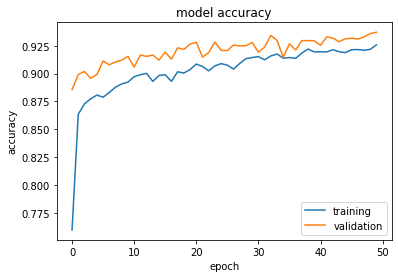

---------------------------------------------------------
Entrenando el fold número 2...
Epoch 1/50
1338/1350 [============================>.] - ETA: 0s - loss: 1.0210 - accuracy: 0.7085
Epoch 1: val_accuracy improved from -inf to 0.84354, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 1.0180 - accuracy: 0.7095 - val_loss: 0.6006 - val_accuracy: 0.8435
Epoch 2/50
1341/1350 [============================>.] - ETA: 0s - loss: 0.6270 - accuracy: 0.8149
Epoch 2: val_accuracy improved from 0.84354 to 0.85271, saving model to tmp/checkpoint
1350/1350 [==============================] - 5s 4ms/step - loss: 0.6269 - accuracy: 0.8150 - val_loss: 0.4802 - val_accuracy: 0.8527
Epoch 3/50
1344/1350 [============================>.] - ETA: 0s - loss: 0.5267 - accuracy: 0.8410
Epoch 3: val_accuracy improved from 0.85271 to 0.88167, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.5266 - accuracy: 0.8410 - 

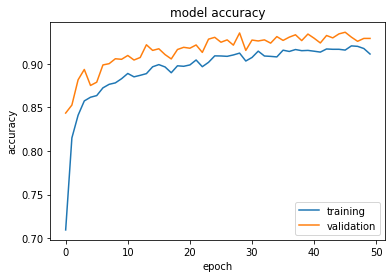

---------------------------------------------------------
Entrenando el fold número 3...
Epoch 1/50
1328/1350 [============================>.] - ETA: 0s - loss: 0.9317 - accuracy: 0.7304
Epoch 1: val_accuracy improved from -inf to 0.82896, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.9274 - accuracy: 0.7315 - val_loss: 0.6029 - val_accuracy: 0.8290
Epoch 2/50
1333/1350 [============================>.] - ETA: 0s - loss: 0.5665 - accuracy: 0.8355
Epoch 2: val_accuracy improved from 0.82896 to 0.88354, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.5649 - accuracy: 0.8361 - val_loss: 0.4213 - val_accuracy: 0.8835
Epoch 3/50
1344/1350 [============================>.] - ETA: 0s - loss: 0.4871 - accuracy: 0.8577
Epoch 3: val_accuracy did not improve from 0.88354
1350/1350 [==============================] - 3s 2ms/step - loss: 0.4874 - accuracy: 0.8575 - val_loss: 0.3952 - val_accuracy: 0.8

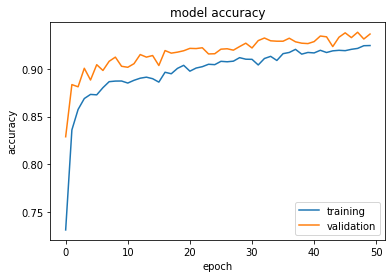

---------------------------------------------------------
Entrenando el fold número 4...
Epoch 1/50
1336/1350 [============================>.] - ETA: 0s - loss: 1.0519 - accuracy: 0.6925
Epoch 1: val_accuracy improved from -inf to 0.82917, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 1.0480 - accuracy: 0.6936 - val_loss: 0.6242 - val_accuracy: 0.8292
Epoch 2/50
1331/1350 [============================>.] - ETA: 0s - loss: 0.5806 - accuracy: 0.8293
Epoch 2: val_accuracy improved from 0.82917 to 0.87250, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.5797 - accuracy: 0.8296 - val_loss: 0.4459 - val_accuracy: 0.8725
Epoch 3/50
1331/1350 [============================>.] - ETA: 0s - loss: 0.4953 - accuracy: 0.8511
Epoch 3: val_accuracy improved from 0.87250 to 0.88583, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.4955 - accuracy: 0.8511 - 

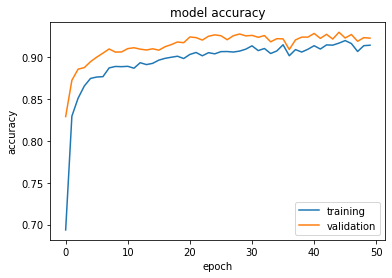

---------------------------------------------------------
Entrenando el fold número 5...
Epoch 1/50
1340/1350 [============================>.] - ETA: 0s - loss: 0.9645 - accuracy: 0.7225
Epoch 1: val_accuracy improved from -inf to 0.85000, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.9614 - accuracy: 0.7233 - val_loss: 0.5292 - val_accuracy: 0.8500
Epoch 2/50
1331/1350 [============================>.] - ETA: 0s - loss: 0.5571 - accuracy: 0.8367
Epoch 2: val_accuracy improved from 0.85000 to 0.88104, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.5560 - accuracy: 0.8367 - val_loss: 0.4254 - val_accuracy: 0.8810
Epoch 3/50
1350/1350 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.8502
Epoch 3: val_accuracy improved from 0.88104 to 0.88500, saving model to tmp/checkpoint
1350/1350 [==============================] - 4s 3ms/step - loss: 0.4947 - accuracy: 0.8502 - 

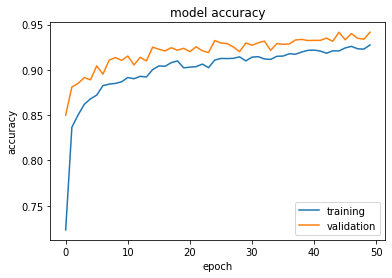

In [ ]:
for train, test in kfcv.split(inputs, targets):
  model = Sequential()
  model.add(Dense(units = 32, activation='sigmoid', input_shape = (image_size,)))
  model.add(Dense(units = num_classes, activation='softmax'))
  # model.summary()
  plot_model(model, show_shapes = 'True', show_layer_names='True')

  model.compile(loss = loss_function, optimizer = optimizer, metrics = ['accuracy'])

  checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, monitor = 'val_accuracy', verbose = 1, save_best_only=True, mode='max')

  callbacks_list = [checkpoint]

  print("---------------------------------------------------------")
  print(f'Entrenando el fold número {number_fold}...')

  history = model.fit(inputs[train], targets[train], batch_size=batch_size, epochs = number_epochs, verbose = True, validation_split=0.1, callbacks=[checkpoint])

  scores = model.evaluate(inputs[test], targets[test], verbose = True)
  print(f'Puntaje para el fold número {number_fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc='best')
  plt.show()

  number_fold = number_fold + 1



### Segundo modelo

In [ ]:
for layers in [1, 2]:
  model = create_dense([32, 32] * layers)
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 32)                25120     
                                                                 
 dense_97 (Dense)            (None, 32)                1056      
                                                                 
 dense_98 (Dense)            (None, 32)                1056      
                                                                 
 dense_99 (Dense)            (None, 32)                1056      
                                                                 
 dense_100 (Dense)           (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os

checkpoint_filepath2 = 'tmp/checkpoint2'
checkpoint_dir2 = os.path.dirname(checkpoint_filepath2)

In [ ]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model

---------------------------------------------------------
Entrenando el fold número 1...
Epoch 1/50
1341/1350 [============================>.] - ETA: 0s - loss: 1.4167 - accuracy: 0.5572
Epoch 1: val_accuracy improved from -inf to 0.76063, saving model to tmp/checkpoint2
1350/1350 [==============================] - 7s 4ms/step - loss: 1.4132 - accuracy: 0.5584 - val_loss: 0.8043 - val_accuracy: 0.7606
Epoch 2/50
1345/1350 [============================>.] - ETA: 0s - loss: 0.7446 - accuracy: 0.7748
Epoch 2: val_accuracy improved from 0.76063 to 0.79042, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 0.7445 - accuracy: 0.7748 - val_loss: 0.6586 - val_accuracy: 0.7904
Epoch 3/50
1344/1350 [============================>.] - ETA: 0s - loss: 0.6401 - accuracy: 0.8077
Epoch 3: val_accuracy improved from 0.79042 to 0.84312, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 0.6397 - accuracy: 0.8079

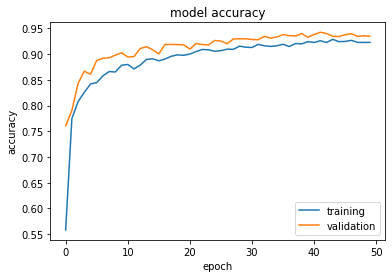

---------------------------------------------------------
Entrenando el fold número 2...
Epoch 1/50
1332/1350 [============================>.] - ETA: 0s - loss: 1.4756 - accuracy: 0.4412
Epoch 1: val_accuracy improved from -inf to 0.60250, saving model to tmp/checkpoint2
1350/1350 [==============================] - 6s 4ms/step - loss: 1.4711 - accuracy: 0.4432 - val_loss: 1.1209 - val_accuracy: 0.6025
Epoch 2/50
1343/1350 [============================>.] - ETA: 0s - loss: 1.0797 - accuracy: 0.6090
Epoch 2: val_accuracy improved from 0.60250 to 0.66771, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 1.0790 - accuracy: 0.6092 - val_loss: 0.9518 - val_accuracy: 0.6677
Epoch 3/50
1347/1350 [============================>.] - ETA: 0s - loss: 0.9277 - accuracy: 0.6794
Epoch 3: val_accuracy improved from 0.66771 to 0.69875, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 0.9278 - accuracy: 0.6793

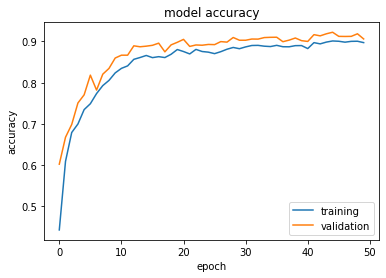

---------------------------------------------------------
Entrenando el fold número 3...
Epoch 1/50
1349/1350 [============================>.] - ETA: 0s - loss: 1.2565 - accuracy: 0.5676
Epoch 1: val_accuracy improved from -inf to 0.72292, saving model to tmp/checkpoint2
1350/1350 [==============================] - 6s 4ms/step - loss: 1.2562 - accuracy: 0.5677 - val_loss: 0.8612 - val_accuracy: 0.7229
Epoch 2/50
1338/1350 [============================>.] - ETA: 0s - loss: 0.8374 - accuracy: 0.7181
Epoch 2: val_accuracy improved from 0.72292 to 0.78562, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 0.8374 - accuracy: 0.7184 - val_loss: 0.7019 - val_accuracy: 0.7856
Epoch 3/50
1344/1350 [============================>.] - ETA: 0s - loss: 0.7421 - accuracy: 0.7636
Epoch 3: val_accuracy improved from 0.78562 to 0.80146, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 0.7420 - accuracy: 0.7636

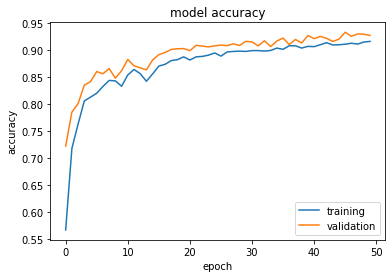

---------------------------------------------------------
Entrenando el fold número 4...
Epoch 1/50
1340/1350 [============================>.] - ETA: 0s - loss: 1.3893 - accuracy: 0.4878
Epoch 1: val_accuracy improved from -inf to 0.66271, saving model to tmp/checkpoint2
1350/1350 [==============================] - 6s 4ms/step - loss: 1.3872 - accuracy: 0.4892 - val_loss: 1.0768 - val_accuracy: 0.6627
Epoch 2/50
1347/1350 [============================>.] - ETA: 0s - loss: 1.0289 - accuracy: 0.6415
Epoch 2: val_accuracy improved from 0.66271 to 0.68021, saving model to tmp/checkpoint2
1350/1350 [==============================] - 6s 5ms/step - loss: 1.0288 - accuracy: 0.6415 - val_loss: 0.9044 - val_accuracy: 0.6802
Epoch 3/50
1347/1350 [============================>.] - ETA: 0s - loss: 0.8988 - accuracy: 0.6916
Epoch 3: val_accuracy improved from 0.68021 to 0.74583, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 0.8982 - accuracy: 0.6919

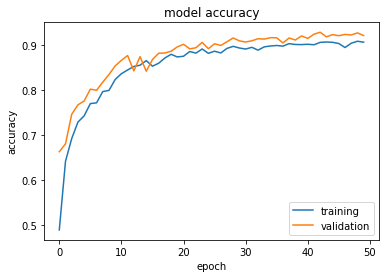

---------------------------------------------------------
Entrenando el fold número 5...
Epoch 1/50
1339/1350 [============================>.] - ETA: 0s - loss: 1.2942 - accuracy: 0.5710
Epoch 1: val_accuracy improved from -inf to 0.74500, saving model to tmp/checkpoint2
1350/1350 [==============================] - 6s 4ms/step - loss: 1.2915 - accuracy: 0.5722 - val_loss: 0.8726 - val_accuracy: 0.7450
Epoch 2/50
1342/1350 [============================>.] - ETA: 0s - loss: 0.8579 - accuracy: 0.7399
Epoch 2: val_accuracy improved from 0.74500 to 0.79562, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 0.8573 - accuracy: 0.7402 - val_loss: 0.6866 - val_accuracy: 0.7956
Epoch 3/50
1344/1350 [============================>.] - ETA: 0s - loss: 0.7391 - accuracy: 0.7742
Epoch 3: val_accuracy improved from 0.79562 to 0.83146, saving model to tmp/checkpoint2
1350/1350 [==============================] - 5s 4ms/step - loss: 0.7385 - accuracy: 0.7744

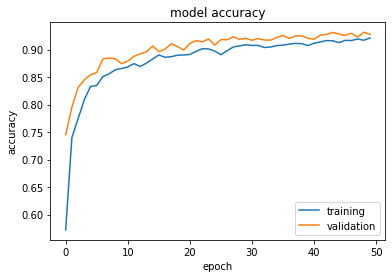

In [ ]:
for train, test in kfcv.split(inputs, targets):
  for layers in [1, 2, 3]:
    model = create_dense([32, 32] * layers)
  plot_model(model, show_shapes = 'True', show_layer_names='True')

  model.compile(loss = loss_function, optimizer = optimizer, metrics = ['accuracy'])

  checkpoint2 = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath2, monitor = 'val_accuracy', verbose = 1, save_best_only=True, mode='max')

  callbacks_list = [checkpoint2]

  print("---------------------------------------------------------")
  print(f'Entrenando el fold número {number_fold}...')

  history = model.fit(inputs[train], targets[train], batch_size=batch_size, epochs = number_epochs, verbose = True, validation_split=0.1, callbacks=[checkpoint2])

  scores = model.evaluate(inputs[test], targets[test], verbose = True)
  print(f'Puntaje para el fold número {number_fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc='best')
  plt.show()

  number_fold = number_fold + 1

###Crear archivo con los pesos para no tener que ejecutar la red neuronal siempre

In [ ]:
!zip -r /file2.zip /content/tmp/checkpoint2

  adding: content/tmp/checkpoint2/ (stored 0%)
  adding: content/tmp/checkpoint2/keras_metadata.pb (deflated 90%)
  adding: content/tmp/checkpoint2/saved_model.pb (deflated 89%)
  adding: content/tmp/checkpoint2/variables/ (stored 0%)
  adding: content/tmp/checkpoint2/variables/variables.index (deflated 69%)
  adding: content/tmp/checkpoint2/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: content/tmp/checkpoint2/assets/ (stored 0%)


### Se descomprimen los pesos que se descargaron anteriormente (correr obligatoriamente)

In [ ]:
!unzip check.zip

Archive:  check.zip
   creating: checkpoint/
   creating: checkpoint/assets/
  inflating: checkpoint/keras_metadata.pb  
  inflating: checkpoint/saved_model.pb  
   creating: checkpoint/variables/
  inflating: checkpoint/variables/variables.data-00000-of-00001  
  inflating: checkpoint/variables/variables.index  


In [ ]:
!unzip check2.zip

Archive:  check2.zip
   creating: checkpoint2/
   creating: checkpoint2/assets/
  inflating: checkpoint2/keras_metadata.pb  
  inflating: checkpoint2/saved_model.pb  
   creating: checkpoint2/variables/
  inflating: checkpoint2/variables/variables.data-00000-of-00001  
  inflating: checkpoint2/variables/variables.index  


## Se cargan los modelos ya entrenados

### Cargando el modelo 1 con los pesos ya obtenidos

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation='sigmoid', input_shape = (image_size,)))
model.add(Dense(units = num_classes, activation='softmax'))


In [ ]:
config = "checkpoint"

In [ ]:
model.load_weights(config)

In [ ]:
model.compile(loss = loss_function, optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose = True)
scores

313/313 [==============================] - 1s 2ms/step - loss: 0.2425 - accuracy: 0.9290


[0.24249738454818726, 0.9290000200271606]

### Cargando el modelo 2 con los pesos ya obtenidos

In [ ]:
for layers in [1, 2]:
    model2 = create_dense([32, 32] * layers)

In [ ]:
config2 = "checkpoint2"

In [ ]:
model2.load_weights(config)

In [ ]:
model2.compile(loss = loss_function, optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
scores2 = model2.evaluate(x_test, y_test, verbose = True)
scores2

313/313 [==============================] - 1s 2ms/step - loss: 0.2765 - accuracy: 0.9178


[0.2764727473258972, 0.9178000092506409]

### Usando imágenes creadas en el modelo 1


In [ ]:
import cv2

(28, 28)

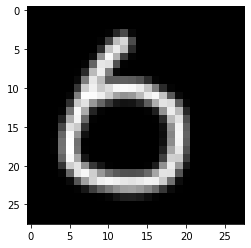

In [ ]:
test_image = cv2.imread('seis_prueba.png', cv2.IMREAD_GRAYSCALE)
test_image_inverted = cv2.bitwise_not(test_image)
plt.imshow(test_image_inverted, cmap='gray')

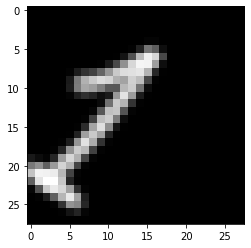

In [ ]:
test_image2 = cv2.imread('uno_prueba.png', cv2.IMREAD_GRAYSCALE)
test_image_inverted2 = cv2.bitwise_not(test_image2)
plt.imshow(test_image_inverted2, cmap='gray')

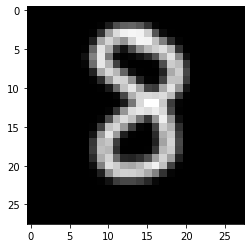

In [ ]:
test_image3 = cv2.imread('ocho_prueba.png', cv2.IMREAD_GRAYSCALE)
test_image_inverted3 = cv2.bitwise_not(test_image3)
plt.imshow(test_image_inverted3, cmap='gray')

In [ ]:
seis_array = asarray(test_image_inverted)
uno_array = asarray(test_image_inverted2)
ocho_array = asarray(test_image_inverted3)

In [ ]:
imagenes_prueba = np.array([seis_array,uno_array,ocho_array])

In [ ]:
imagenes_prueba = imagenes_prueba.reshape(imagenes_prueba.shape[0], image_size) 

In [ ]:
datos_prueba = np.array([6,1,8])

In [ ]:
datos_procesados = to_categorical(datos_prueba, 10)

In [ ]:
datos_procesados

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
datos_procesados.shape

(3, 10)

In [ ]:
score = model.predict(imagenes_prueba)
score

1/1 [==============================] - 0s 20ms/step


array([[1.55620975e-04, 1.59603536e-01, 4.55101579e-02, 4.06933576e-02,
        1.04294475e-02, 6.20767415e-01, 1.84333022e-03, 1.18089907e-01,
        6.74324809e-04, 2.23285262e-03],
       [1.55620975e-04, 1.59603536e-01, 4.55101579e-02, 4.06933576e-02,
        1.04294475e-02, 6.20767415e-01, 1.84333022e-03, 1.18089907e-01,
        6.74324809e-04, 2.23285262e-03],
       [1.55620975e-04, 1.59603536e-01, 4.55101579e-02, 4.06933576e-02,
        1.04294475e-02, 6.20767415e-01, 1.84333022e-03, 1.18089907e-01,
        6.74324809e-04, 2.23285262e-03]], dtype=float32)

### Usando imágenes creadas en el modelo 2

In [ ]:
import cv2

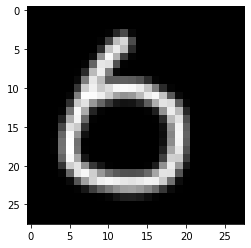

In [ ]:
test_image = cv2.imread('seis_prueba.png', cv2.IMREAD_GRAYSCALE)
test_image_inverted = cv2.bitwise_not(test_image)
plt.imshow(test_image_inverted, cmap='gray')

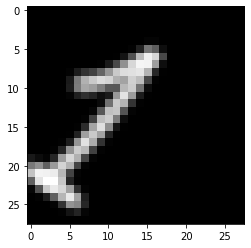

In [ ]:
test_image2 = cv2.imread('uno_prueba.png', cv2.IMREAD_GRAYSCALE)
test_image_inverted2 = cv2.bitwise_not(test_image2)
plt.imshow(test_image_inverted2, cmap='gray')

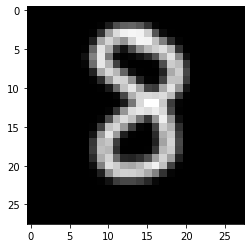

In [ ]:
test_image3 = cv2.imread('ocho_prueba.png', cv2.IMREAD_GRAYSCALE)
test_image_inverted3 = cv2.bitwise_not(test_image3)
plt.imshow(test_image_inverted3, cmap='gray')

In [ ]:
seis_array = asarray(test_image_inverted)
uno_array = asarray(test_image_inverted2)
ocho_array = asarray(test_image_inverted3)

In [ ]:
imagenes_prueba = np.array([seis_array,uno_array,ocho_array])

In [ ]:
imagenes_prueba = imagenes_prueba.reshape(imagenes_prueba.shape[0], image_size) 

In [ ]:
datos_prueba = np.array([6,1,8])

In [ ]:
datos_procesados = to_categorical(datos_prueba, 10)

In [ ]:
datos_procesados

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
datos_procesados.shape

(3, 10)

In [ ]:
score2 = model2.predict(imagenes_prueba)
score2

1/1 [==============================] - 0s 71ms/step


array([[4.94578294e-02, 2.74986494e-04, 8.21347989e-04, 1.35462089e-02,
        2.67530023e-03, 9.14067924e-01, 1.15225045e-02, 1.22496788e-03,
        2.59472174e-03, 3.81417200e-03],
       [1.47635525e-03, 6.54937886e-03, 6.60669757e-03, 9.34216142e-01,
        2.69834072e-05, 4.80360202e-02, 4.20968499e-05, 7.94829160e-04,
        1.16442214e-03, 1.08707009e-03],
       [3.48249334e-03, 5.92766814e-02, 1.83878496e-01, 3.61126393e-01,
        2.93867633e-04, 5.90744764e-02, 7.21347937e-03, 1.06984994e-03,
        3.23963404e-01, 6.20850304e-04]], dtype=float32)

## Image Augmentation con las imágenes creadas

#### random_shear

In [ ]:
train1 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(seis_array)[..., None])
train2 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(uno_array)[..., None])
train3 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(ocho_array)[..., None])

In [ ]:
train1_shear = tf.keras.preprocessing.image.random_shear(train1, 75)
train2_shear = tf.keras.preprocessing.image.random_shear(train2, 50)
train3_shear = tf.keras.preprocessing.image.random_shear(train3, 100)

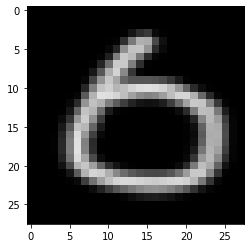

In [ ]:
plt.imshow(train1_shear, cmap='gray')

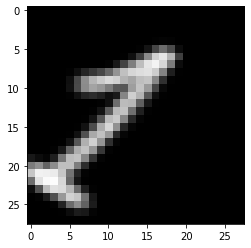

In [ ]:
plt.imshow(train2_shear, cmap='gray')

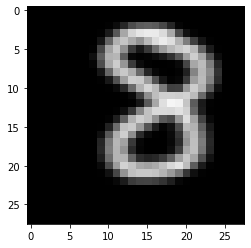

In [ ]:
plt.imshow(train3_shear, cmap='gray')

In [ ]:
train1_shear = np.zeros( (28, 28, 3) )
result1 = train1_shear[:, :, 0]
print(result1.shape)

(28, 28)


In [ ]:
train2_shear = np.zeros( (28, 28, 3) )
result2 = train2_shear[:, :, 0]
print(result2.shape)

(28, 28)


In [ ]:
train3_shear = np.zeros( (28, 28, 3) )
result3 = train3_shear[:, :, 0]
print(result3.shape)

(28, 28)


In [ ]:
imagenes_prueba = np.array([result1,result2,result3])
imagenes_prueba = imagenes_prueba.reshape(imagenes_prueba.shape[0], image_size) 
score = model.predict(imagenes_prueba)
score

1/1 [==============================] - 0s 19ms/step


array([[0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768],
       [0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768],
       [0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768]],
      dtype=float32)

In [ ]:
score2 = model2.predict(imagenes_prueba)
score2

1/1 [==============================] - 0s 18ms/step


array([[0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535],
       [0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535],
       [0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535]],
      dtype=float32)

#### random_rotation

In [ ]:
train1 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(seis_array)[..., None])
train2 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(uno_array)[..., None])
train3 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(ocho_array)[..., None])

In [ ]:
train1_rotate = tf.keras.preprocessing.image.random_rotation(train1, 100)
train2_rotate = tf.keras.preprocessing.image.random_rotation(train2, 90)
train3_rotate = tf.keras.preprocessing.image.random_rotation(train3, 30)

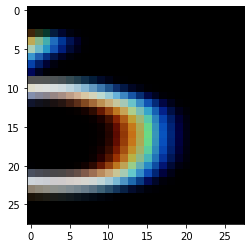

In [ ]:
plt.imshow(train1_rotate, cmap='gray')

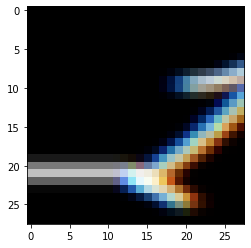

In [ ]:
plt.imshow(train2_rotate, cmap='gray')

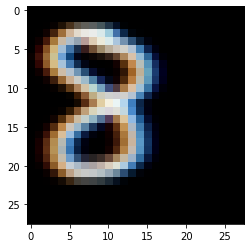

In [ ]:
plt.imshow(train3_rotate, cmap='gray')

In [ ]:
train1_rotate = np.zeros( (28, 28, 3) )
result1 = train1_rotate[:, :, 0]
print(result1.shape)

(28, 28)


In [ ]:
train2_rotate = np.zeros( (28, 28, 3) )
result2 = train2_rotate[:, :, 0]
print(result2.shape)

(28, 28)


In [ ]:
train3_rotate = np.zeros( (28, 28, 3) )
result3 = train3_rotate[:, :, 0]
print(result3.shape)

(28, 28)


In [ ]:
imagenes_prueba = np.array([result1,result2,result3])
imagenes_prueba = imagenes_prueba.reshape(imagenes_prueba.shape[0], image_size) 
score = model.predict(imagenes_prueba)
score

1/1 [==============================] - 0s 84ms/step


array([[0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768],
       [0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768],
       [0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768]],
      dtype=float32)

In [ ]:
score2 = model2.predict(imagenes_prueba)
score2

1/1 [==============================] - 0s 124ms/step


array([[0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535],
       [0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535],
       [0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535]],
      dtype=float32)

#### random_shift

In [ ]:
train1 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(seis_array)[..., None])
train2 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(uno_array)[..., None])
train3 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(ocho_array)[..., None])

In [ ]:
train1_zoom = tf.keras.preprocessing.image.random_zoom(train1, [0.8,0.76])
train2_zoom = tf.keras.preprocessing.image.random_zoom(train2, [0.77,0.73])
train3_zoom = tf.keras.preprocessing.image.random_zoom(train3, [0.6,0.6])

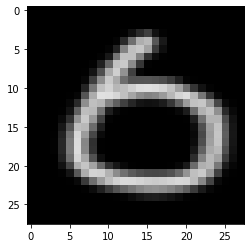

In [ ]:
plt.imshow(train1_zoom, cmap='gray')

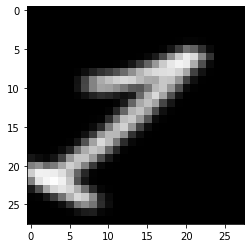

In [ ]:
plt.imshow(train2_zoom, cmap='gray')

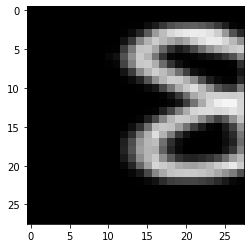

In [ ]:
plt.imshow(train3_zoom, cmap='gray')

In [ ]:
train1_zoom = np.zeros( (28, 28, 3) )
result1 = train1_zoom[:, :, 0]
print(result1.shape)

(28, 28)


In [ ]:
train2_zoom = np.zeros( (28, 28, 3) )
result2 = train2_zoom[:, :, 0]
print(result2.shape)

(28, 28)


In [ ]:
train3_zoom = np.zeros( (28, 28, 3) )
result3 = train3_zoom[:, :, 0]
print(result3.shape)

(28, 28)


In [ ]:
imagenes_prueba = np.array([result1,result2,result3])
imagenes_prueba = imagenes_prueba.reshape(imagenes_prueba.shape[0], image_size) 
score = model.predict(imagenes_prueba)
score

1/1 [==============================] - 0s 30ms/step


array([[0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768],
       [0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768],
       [0.04825479, 0.07089323, 0.07193735, 0.23021095, 0.09261014,
        0.16754797, 0.05297288, 0.02219418, 0.10127087, 0.14210768]],
      dtype=float32)

In [ ]:
score2 = model2.predict(imagenes_prueba)
score2

1/1 [==============================] - 0s 72ms/step


array([[0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535],
       [0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535],
       [0.00377679, 0.2059784 , 0.05004988, 0.03403628, 0.03598491,
        0.14638832, 0.00104968, 0.5107422 , 0.00084822, 0.01114535]],
      dtype=float32)

## Conclusiones

Se pueden ver diferentes tendencias al observar los resultados de los dos modelos que se crearon. La primera es que con los splits de prueba predeterminados de MNIST, se ve que ambos modelos son muy efectivos, alcanzando ambos valores superiores al 90% de precisión o 'accuracy'.
- > Modelo 1: 0.9290000200271606
- > Modelo 2: 0.9178000092506409

En modelos de redes neuronales, un 1% de diferencia es una muy significativa por lo que sin duda se escogería el modelo 1 sobre el modelo 2 si se quiere aplicar para clasificar los valores de MNIST. Sin embargo, surge un problema ya que ninguno de los dos modelos reconoce los 3 dígitos que se crearon en Paint.net para porbarlos con datos ajenos al Dataset. Se usaron los dígitos 6, 1 y 8, en ese orden, y ninguno de los dos modelos fue capáz de reconocer uno de los 3, ni siquiera con las funciones de Image Augmentation de Tensorflow. Esto puede ser debido a que los dígitos creados tienen diferencias sustanciales con los dígitos de MNIST, tanto en grosor como en definición de los números en sí. Esto impide que los modelos puedan reconocerlos de manera efectiva. Entre estas diferencias se encuentran:
- > El grosor de los números
- > La orientación
- > La manera de graficar los números 

Para mejorar estos resultados se pueden buscar otras soluciones como redes neuronales aún más profundas o incluso combinar regresores 



# Referencias


Keras API reference https://keras.io/api/

Oracle. (2022). ¿Qué es una base de datos? Qué es una base de datos | Oracle México. Retrieved December 19, 2022, from https://www.oracle.com/mx/database/what-is-database/

Team, D. S. (2020, December 15). Base de Datos del mnist - procesamiento del lenguaje natural. DATA SCIENCE. Retrieved December 19, 2022, from https://datascience.eu/es/procesamiento-del-lenguaje-natural/base-de-datos-del-mnist/ 

TensorFlow Org. (n.d.). Crea Modelos de Aprendizaje Automático de Nivel de Producción Con Tensorflow. TensorFlow. Retrieved December 19, 2022, from  https://www.tensorflow.org/api_docs/python/tf?hl=es-419

Universidad Oberta de Catalunya. (n.d.). Keras + tensorflow. Espacio de recursos de ciencia de datos. Retrieved December 19, 2022, from http://datascience.recursos.uoc.edu/es/keras-tensorflow/

Scikit-learn developers. (n.d.). API reference¶. scikit. Retrieved December 19, 2022, from https://scikit-learn.org/0.21/modules/classes.html 

IBM. (2021, August 17). El modelo de redes neuronales. IBM Documentación. Retrieved December 19, 2022, from https://www.ibm.com/docs/es/spss-modeler/saas?topic=networks-neural-model 